## Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5158,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.rename(columns={"v1":"target","v2":"text"}, inplace=True)

In [8]:
df.describe()

,target,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target']=le.fit_transform(df['target'])

# 0 for HAM and 1 for SPAM

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

414

In [14]:
df.drop_duplicates(keep="first", inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5158, 2)

## EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     642
Name: count, dtype: int64

<Axes: >

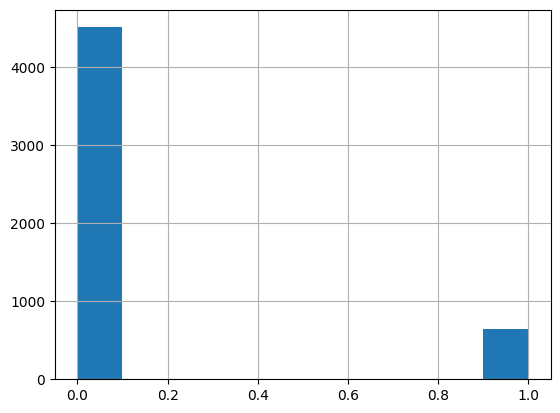

In [18]:
df['target'].hist()
#Data is imbalanced

([<matplotlib.patches.Wedge at 0x2981bddd0>,
 [Text(-1.016971146764745, 0.41924895545248453, 'ham'),
  Text(1.016971156577975, -0.4192489316485567, 'spam')],
 [Text(-0.5547115345989518, 0.2286812484286279, '87.6'),
  Text(0.5547115399516227, -0.22868123544466726, '12.4')])

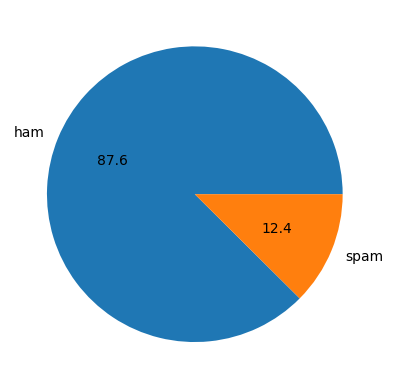

In [19]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.1f")

In [20]:
import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download("punkt")
# nltk.download('stopwords')

In [21]:
df['text_char'] = df['text'].apply(len)

In [22]:
df.sample(10)

,target,text,text_char
745,0,Dunno he jus say go lido. Same time 930.,40
201,0,Hello darlin ive finished college now so txt m...,84
604,0,Meet after lunch la...,22
874,0,Talk With Yourself Atleast Once In A Day...!!!...,139
2168,0,Thx. All will be well in a few months,37
5228,1,PRIVATE! Your 2003 Account Statement for <fone...,146
4179,0,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67
798,0,Ok i msg u b4 i leave my house.,31
673,0,Ditto. And you won't have to worry about me sa...,153
4156,0,This single single answers are we fighting? Pl...,84


In [23]:
df['text_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df['text_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.sample(10)

,target,text,text_char,text_words,text_sent
5561,0,Get me out of this dump heap. My mom decided t...,70,18,3
1104,1,Message Important information for O2 user. Tod...,159,29,3
1721,0,Am watching house ‰ÛÒ very entertaining ‰ÛÒ am...,144,26,1
2480,1,Urgent! call 09066612661 from landline. Your c...,168,33,3
4594,0,Yo sorry was in the shower sup,30,7,1
3187,1,This is the 2nd time we have tried 2 contact u...,153,34,4
2883,0,Cbe is really good nowadays:)lot of shop and s...,77,19,1
4055,0,"Ha ha nan yalrigu heltini..Iyo kothi chikku, u...",255,68,2
79,0,Its not the same here. Still looking for a job...,76,20,3
5189,1,ree entry in 2 a weekly comp for a chance to w...,142,36,2


In [26]:
df.describe()

,target,text_char,text_words,text_sent
count,5158.000000,5158.000000,5158.000000,5158.000000
mean,0.124467,78.806708,18.430399,1.962195
std,0.330145,58.187284,13.326907,1.445515
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df_ham = df[df['target']==0]
df_spam = df[df['target']==1]

In [28]:
df_ham.describe()

,target,text_char,text_words,text_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.449734,17.123782,1.820195
std,0.0,56.352902,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [29]:
df_spam.describe()

,target,text_char,text_words,text_sent
count,642.0,642.00000,642.000000,642.000000
mean,1.0,137.59190,27.621495,2.961059
std,0.0,30.29638,7.048863,1.477880
min,1.0,13.00000,2.000000,1.000000
25%,1.0,131.25000,25.000000,2.000000
50%,1.0,148.00000,29.000000,3.000000
75%,1.0,157.00000,32.000000,4.000000
max,1.0,224.00000,46.000000,9.000000


<Axes: xlabel='text_char', ylabel='Count'>

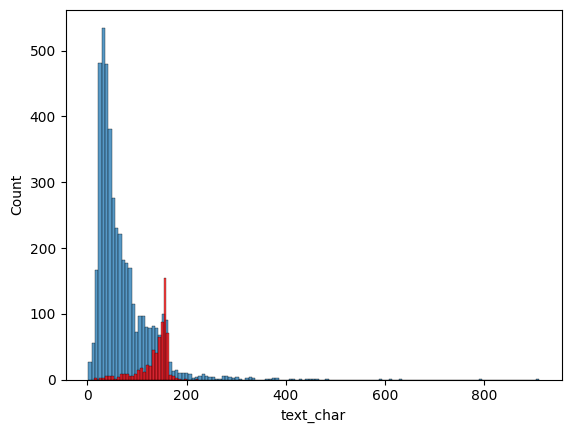

In [30]:
sns.histplot(df_ham['text_char'])
sns.histplot(df_spam['text_char'], color='red')

<Axes: xlabel='text_words', ylabel='Count'>

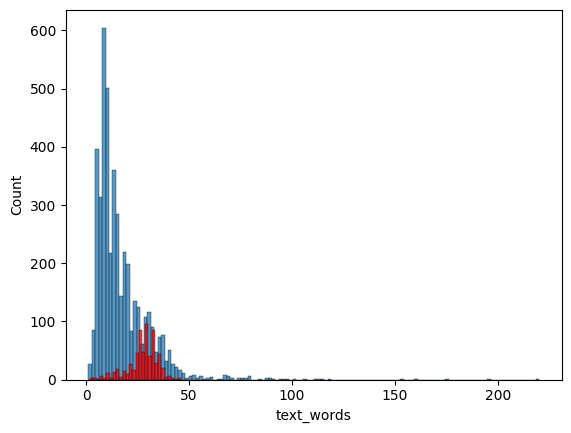

In [31]:
sns.histplot(df_ham['text_words'])
sns.histplot(df_spam['text_words'], color='red')

<Axes: xlabel='text_sent', ylabel='Count'>

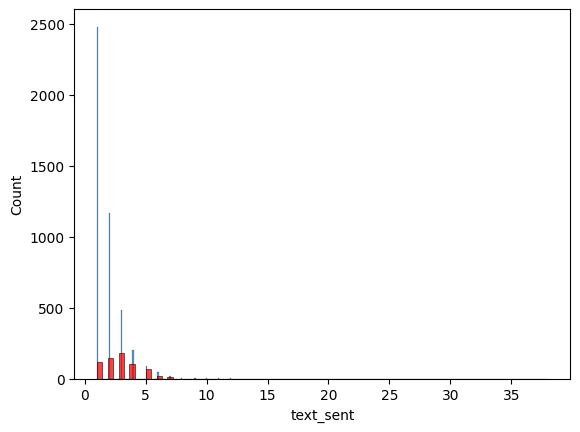

In [32]:
sns.histplot(df_ham['text_sent'])
sns.histplot(df_spam['text_sent'], color='red')

In [33]:
#In general there spam messages contain more words and characters

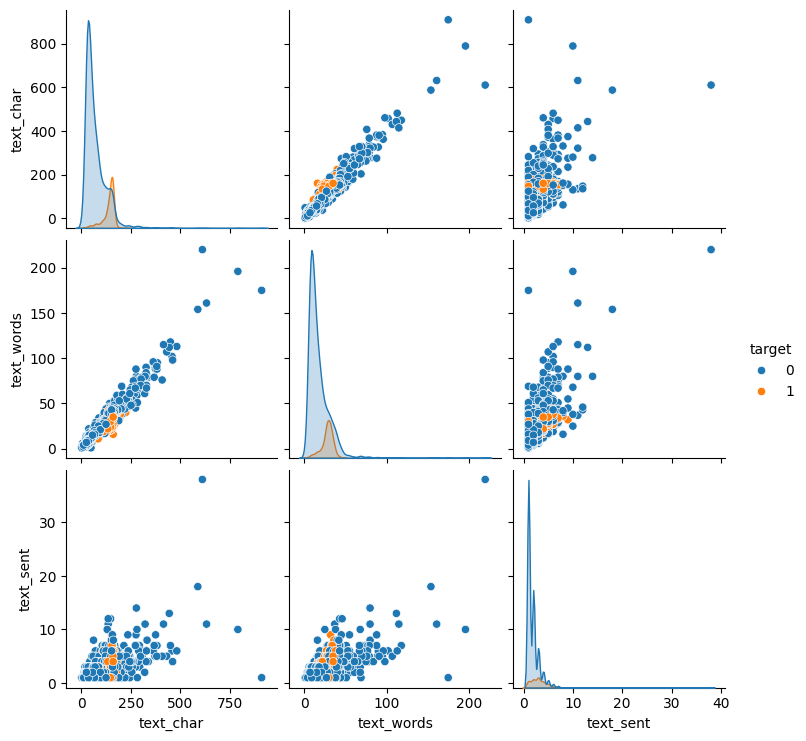

In [34]:
sns.pairplot(df, hue="target")

In [35]:
df.drop('text', axis=1).corr()['target'].sort_values(ascending=False)

target        1.000000
text_char     0.380954
text_sent     0.260565
text_words    0.260058
Name: target, dtype: float64

<Axes: >

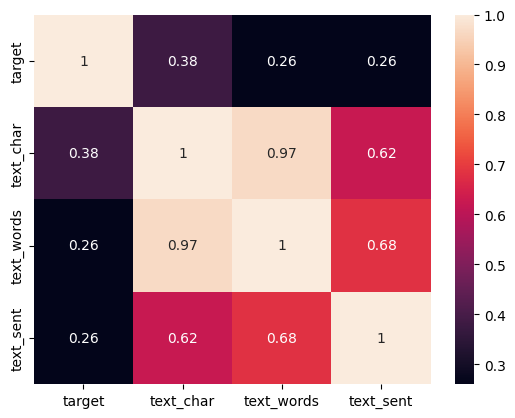

In [36]:
sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

## Preprocessing

In [37]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

def process_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    final = []
    for t in text:
        if t.isalnum():
            final.append(t)

    text = final[:] #Copy by value
    final.clear()

    for t in text:
        if t not in stopwords.words("english") and t not in string.punctuation:
            final.append(t)

    text = final[:]
    final.clear()

    for t in text:
        final.append(ps.stem(t))

    return " ".join(final)
    

In [38]:
df['processed_text'] = df['text'].apply(process_text)

In [39]:
df.sample(10)

,target,text,text_char,text_words,text_sent,processed_text
5020,0,:-( sad puppy noise,19,6,1,sad puppi nois
850,0,U reach orchard already? U wan 2 go buy ticket...,54,13,2,u reach orchard alreadi u wan 2 go buy ticket ...
256,0,Mmm so yummy babe ... Nice jolt to the suzy,43,10,1,mmm yummi babe nice jolt suzi
3670,0,Yup. Thk of u oso boring wat.,29,9,2,yup thk u oso bore wat
2363,1,Fantasy Football is back on your TV. Go to Sky...,162,35,3,fantasi footbal back tv go sky gamestar sky ac...
3293,0,Beautiful tomorrow never comes.. When it comes...,151,30,3,beauti tomorrow never come come alreadi today ...
3073,0,Don know. I did't msg him recently.,35,9,2,know msg recent
891,0,I am great princess! What are you thinking abo...,55,14,3,great princess think
5310,0,"yeah, that's what I was thinking",32,8,1,yeah think
4727,0,I (Career Tel) have added u as a contact on IN...,124,33,2,career tel ad u contact send free sm remov pho...


In [40]:
df_ham = df[df['target']==0]
df_spam = df[df['target']==1]

In [41]:
from wordcloud import WordCloud

In [42]:
wc = WordCloud(width=700, height=700, min_font_size=5, background_color="white")
wc_ham=wc.generate(df_ham['processed_text'].str.cat(sep=" "))

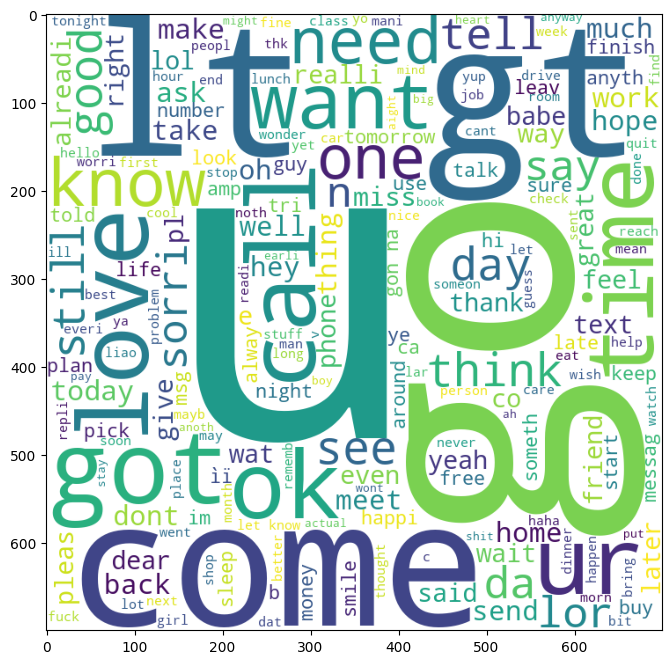

In [43]:
plt.figure(figsize=(15,8))
plt.imshow(wc_ham)

In [44]:
wc = WordCloud(width=700, height=700, min_font_size=5, background_color="white")
wc_spam=wc.generate(df_spam['processed_text'].str.cat(sep=" "))

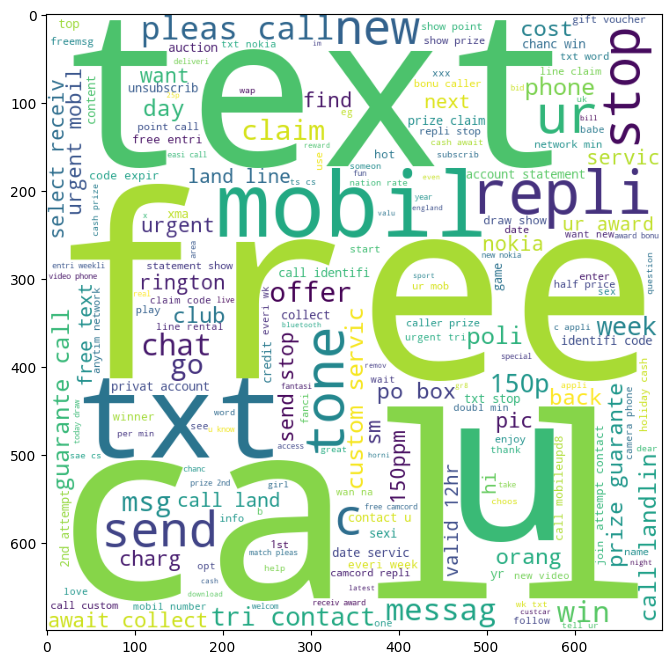

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(wc_spam)

## Test Train Split

In [46]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words

cv = CountVectorizer()

X = cv.fit_transform(df['processed_text']).toarray()
y = df['target']

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedShuffleSplit

#Since the data is imbalanced, we cannot have a direct split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X, y):
    strat_train_set = X[train_index], y.iloc[train_index]
    strat_test_set = X[test_index], y.iloc[test_index]

X_train, y_train = strat_train_set
X_test, y_test = strat_test_set

## Model Building

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=101)
abc = AdaBoostClassifier(n_estimators=50, random_state=101)
bc = BaggingClassifier(n_estimators=50, random_state=101)
etc = ExtraTreesClassifier(n_estimators=50, random_state=101)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=101)

In [50]:
models = {
    'svc' : svc,
    'knc' : knc,
    'mnb' : mnb,
    'dtc' : dtc,
    'lrc' : lrc,
    'rfc' : rfc,
    'abc' : abc,
    'bc'  : bc,
    'etc' : etc,
    'gbc' : gbc
}

In [51]:
from sklearn.metrics import accuracy_score, precision_score

def train_model(model, model_name):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    print("----------> Model Trained: ", model_name)
    return accuracy, precision

In [52]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    model_accuracy, model_precision = train_model(model, name)
    accuracy_scores.append(model_accuracy)
    precision_scores.append(model_precision)

----------> Model Trained:  svc
----------> Model Trained:  knc
----------> Model Trained:  mnb
----------> Model Trained:  dtc
----------> Model Trained:  lrc
----------> Model Trained:  rfc
----------> Model Trained:  abc
----------> Model Trained:  bc
----------> Model Trained:  etc
----------> Model Trained:  gbc


In [53]:
performance_df = pd.DataFrame({'Algorithm':models.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [54]:
#Here Precision Matters more as the data is imbalanced
performance_df.sort_values('Precision', ascending=False, )

,Algorithm,Accuracy,Precision
5,rfc,0.967700,0.993103
9,gbc,0.951550,0.983607
1,knc,0.912145,0.983051
4,lrc,0.977390,0.964706
7,bc,0.967054,0.961039
8,etc,0.970930,0.956790
3,dtc,0.934755,0.925926
2,mnb,0.978036,0.911917
6,abc,0.962532,0.904192
0,svc,0.930233,0.732240


In [55]:
#The Best Models from here are RFC and ETC

## Model Tuning

In [56]:
rfc = RandomForestClassifier
etc = ExtraTreesClassifier
knc = KNeighborsClassifier

In [57]:
from sklearn.model_selection import GridSearchCV

models = {
    'rfc' : rfc,
    'etc' : etc,
    'knc' : knc
}

param_grid = {
    'rfc': {
        'n_estimators': [100, 200],
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
    },
    'etc': {
        'n_estimators': [100, 200],
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
    },
    'knc': {
        'n_neighbors': [2, 3],
        'weights': ['distance'],
        'metric': ['euclidean', 'manhattan'],
    },
}

def get_params_string(params):
    params_arr = []
    for key, value in params.items():
        param_string = key + " : " + str(value)
        params_arr.append(param_string)
    return ", ".join(params_arr)

def tune_model(model, model_name):
    grid=GridSearchCV(model(), param_grid[model_name], cv=5, verbose=3)
    grid.fit(X_train, y_train)

    model = grid.best_estimator_
    models[model_name] = model
    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    print("----------> Model Trained: ", model_name)
    
    return accuracy, precision, get_params_string(grid.best_params_)

In [58]:
accuracy_scores = []
precision_scores = []
params = []

for name, model in models.items():
    model_accuracy, model_precision, model_params = tune_model(model, name)
    accuracy_scores.append(model_accuracy)
    precision_scores.append(model_precision)
    params.append(model_params)

performance_df = pd.DataFrame({'Algorithm':models.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Params': params})

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=20, min_samples_split=2, n_estimators=100;, score=0.929 total time=   2.0s
[CV 2/5] END max_depth=20, min_samples_split=2, n_estimators=100;, score=0.925 total time=   2.0s
[CV 3/5] END max_depth=20, min_samples_split=2, n_estimators=100;, score=0.920 total time=   2.0s
[CV 4/5] END max_depth=20, min_samples_split=2, n_estimators=100;, score=0.922 total time=   1.9s
[CV 5/5] END max_depth=20, min_samples_split=2, n_estimators=100;, score=0.917 total time=   2.0s
[CV 1/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.931 total time=   3.9s
[CV 2/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.931 total time=   3.9s
[CV 3/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.916 total time=   4.0s
[CV 4/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.924 total time=   4.0s
[CV 5/5] END max_depth=20, min_samples_split=2, n_estimat

In [59]:
performance_df.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision,Params
0,etc,0.968992,0.993197,"max_depth : 50, min_samples_split : 10, n_esti..."


In [60]:
#We Choose ETC Model

## Model Performance Report

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1355
           1       0.99      0.76      0.86       193

    accuracy                           0.97      1548
   macro avg       0.98      0.88      0.92      1548
weighted avg       0.97      0.97      0.97      1548



Text(0.5, 1.0, 'Confusion Matrix')

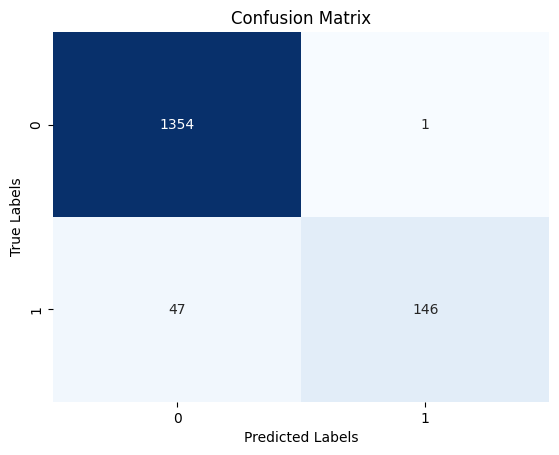

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = models['etc'].predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

## Saving the Model

In [64]:
from joblib import dump, load
dump(models['etc'], 'model.joblib') 
dump(cv, 'vectorizer.joblib') 

['vectorizer.joblib']